In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [3]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [4]:
clf = RandomForestClassifier(random_state=42)

In [5]:
clf.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [6]:
y_train_pred = clf.predict(X_train)

In [7]:
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Training Set: {train_accuracy}")

Accuracy on Training Set: 1.0


In [8]:
y_test_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set: ", accuracy)


Accuracy on Test Set:  0.7747572815533981


In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.18      0.31        60
           1       0.74      0.87      0.80       720
           2       0.81      0.84      0.83       750
           3       0.75      0.80      0.77       450
           4       0.82      0.80      0.81       660
           5       0.86      0.50      0.63        60
           6       0.72      0.56      0.63        90
           7       0.95      0.30      0.46        60
           8       0.64      0.69      0.67       150
           9       0.73      0.49      0.59        90

    accuracy                           0.77      3090
   macro avg       0.79      0.60      0.65      3090
weighted avg       0.78      0.77      0.77      3090



In [11]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)

In [12]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,0.916667,0.305556,0.183333
1,0.736718,0.796426,0.866667
2,0.814767,0.826544,0.838667
3,0.753684,0.774054,0.795556
4,0.823161,0.809854,0.796970
5,0.857143,0.631579,0.500000
6,0.724638,0.628931,0.555556
7,0.947368,0.455696,0.300000
8,0.641975,0.666667,0.693333
9,0.733333,0.586667,0.488889


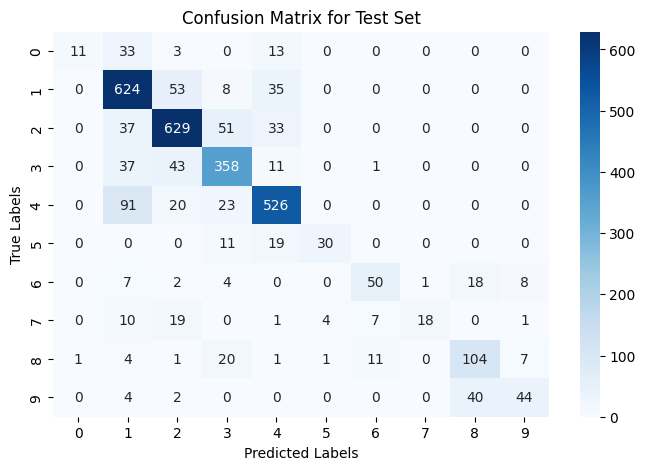

In [13]:
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [14]:
X_train_new_30, X_test_30 = train_test_split(X_train, test_size=0.3, random_state=42)
X_test_new_30 = pd.concat([X_test, X_test_30], ignore_index=True)

In [15]:
y_train_new_30, y_test_30 = train_test_split(y_train, test_size=0.3, random_state=42)
y_test_new_30 = pd.concat([y_test, y_test_30], ignore_index=True)

In [16]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train_new_30.shape)
print("= Shape of y_train is  :", y_train_new_30.shape)
print("= Shape of X_test is   :", X_test_new_30.shape)
print("= Shape of y_test is   :", y_test_new_30.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (6783, 2304)
= Shape of y_train is  : (6783, 1)
= Shape of X_test is   : (5997, 2304)
= Shape of y_test is   : (5997, 1)


In [17]:
clf_30 = RandomForestClassifier(random_state=42)

In [18]:
clf_30.fit(X_train_new_30, y_train_new_30)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [19]:
y_train_pred_30 = clf.predict(X_train_new_30)

In [20]:
accuracy_train_30 = accuracy_score(y_train_new_30, y_train_pred_30)

In [21]:
print("Accuracy on Training Set: ", accuracy_train_30)

Accuracy on Training Set:  1.0


In [22]:
y_pred_30 = clf.predict(X_test_new_30)

In [23]:
accuracy_30 = accuracy_score(y_test_new_30, y_pred_30)
print("========================================")
print("= Accuracy is :", accuracy_30)
print("========================================")

= Accuracy is : 0.8839419709854928


In [24]:
# Classification Report
print(classification_report(y_test_new_30, y_pred_30))

              precision    recall  f1-score   support

           0       0.99      0.64      0.77       135
           1       0.85      0.93      0.89      1385
           2       0.90      0.92      0.91      1428
           3       0.87      0.89      0.88       876
           4       0.91      0.89      0.90      1247
           5       0.95      0.77      0.85       131
           6       0.89      0.79      0.84       190
           7       0.99      0.66      0.79       125
           8       0.82      0.85      0.83       308
           9       0.89      0.73      0.80       172

    accuracy                           0.88      5997
   macro avg       0.91      0.81      0.85      5997
weighted avg       0.89      0.88      0.88      5997



In [25]:
# Calculating precision, recall, and F1-score for each class
precision_30 = precision_score(y_test_new_30, y_pred_30, average=None)
recall_30 = recall_score(y_test_new_30, y_pred_30, average=None)
f1_30 = f1_score(y_test_new_30, y_pred_30, average=None)


In [26]:
# Creating dataframe of precision, recall, and F1-score for each class
df_30 = pd.DataFrame({'Precision': precision_30, 'F1 Score': f1_30, 'Recall': recall_30})
df_30

,Precision,F1 Score,Recall
0,0.988506,0.774775,0.637037
1,0.852513,0.889886,0.930686
2,0.901379,0.908270,0.915266
3,0.870144,0.882386,0.894977
4,0.907830,0.900121,0.892542
5,0.952830,0.852321,0.770992
6,0.887574,0.835655,0.789474
7,0.988095,0.794258,0.664000
8,0.818750,0.834395,0.850649
9,0.887324,0.802548,0.732558


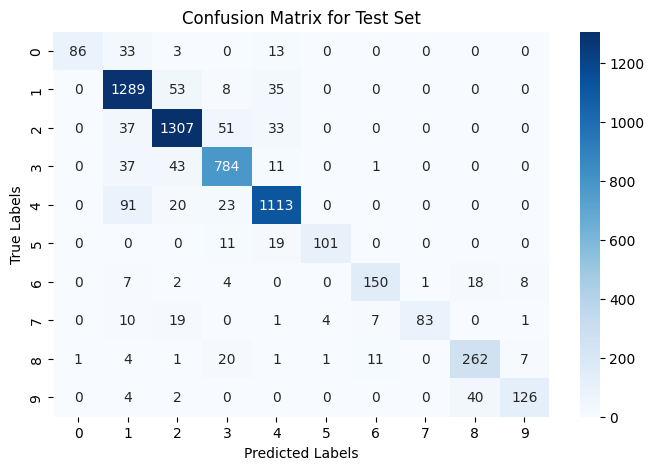

In [27]:
# Confusion Matrix
cm_30 = confusion_matrix(y_test_new_30, y_pred_30)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_30, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new_30), yticklabels=np.unique(y_test_new_30))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [28]:
X_train_new_60, X_test_60 = train_test_split(X_train, test_size=0.6, random_state=42)
X_test_new_60 = pd.concat([X_test, X_test_60], ignore_index=True)

In [29]:
y_train_new_60, y_test_60 = train_test_split(y_train, test_size=0.6, random_state=42)
y_test_new_60 = pd.concat([y_test, y_test_60], ignore_index=True)

In [30]:
clf_60 = RandomForestClassifier(random_state=42)
clf_60.fit(X_train_new_60, y_train_new_60)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [31]:
# Accuracy on Training Set
y_train_pred_60 = clf.predict(X_train_new_60)
accuracy_train_60 = accuracy_score(y_train_new_60, y_train_pred_60)
print("Accuracy on Training Set: ", accuracy_train_60)

Accuracy on Training Set:  1.0


In [32]:
y_pred_60 = clf.predict(X_test_new_60)

In [33]:
accuracy_60 = accuracy_score(y_test_new_60, y_pred_60)
print("========================================")
print("= Accuracy is :", accuracy_60)
print("========================================")

= Accuracy is : 0.921832884097035


In [34]:
# Classification Report
print(classification_report(y_test_new_60, y_pred_60))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       194
           1       0.90      0.95      0.92      2056
           2       0.93      0.94      0.94      2108
           3       0.91      0.93      0.92      1316
           4       0.94      0.93      0.93      1811
           5       0.97      0.84      0.90       189
           6       0.93      0.87      0.90       309
           7       0.99      0.79      0.88       204
           8       0.88      0.90      0.89       468
           9       0.93      0.82      0.87       249

    accuracy                           0.92      8904
   macro avg       0.94      0.87      0.90      8904
weighted avg       0.92      0.92      0.92      8904



In [35]:
# Finding precision, recall, and F1-score for each class
precision_60 = precision_score(y_test_new_60, y_pred_60, average=None)
recall_60 = recall_score(y_test_new_60, y_pred_60, average=None)
f1_60 = f1_score(y_test_new_60, y_pred_60, average=None)

In [36]:
# Creating dataframe of precision, recall, and F1-score for each class
df_60 = pd.DataFrame({'Precision': precision_60, 'F1 Score': f1_60, 'Recall': recall_60})
df_60

,Precision,F1 Score,Recall
0,0.993151,0.852941,0.747423
1,0.897847,0.924746,0.953307
2,0.932864,0.937706,0.942600
3,0.912752,0.921340,0.930091
4,0.936872,0.931408,0.926008
5,0.969512,0.900850,0.841270
6,0.934028,0.901173,0.870550
7,0.993865,0.882834,0.794118
8,0.879167,0.890295,0.901709
9,0.926941,0.867521,0.815261


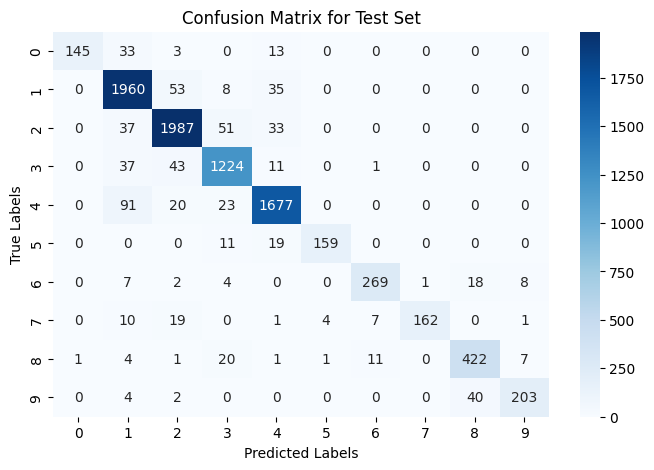

In [37]:
# Confusion Matrix
cm_60 = confusion_matrix(y_test_new_60, y_pred_60)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_60, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new_60), yticklabels=np.unique(y_test_new_60))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()